BACKGROUND INFO

There are 10 types of faults, linked to each bearing defect:
    Ball_007_1: Ball defect (0.007 inch)
    Ball_014_1: Ball defect (0.014 inch)
    Ball_021_1: Ball defect (0.021 inch)
    IR_007_1: Inner race fault (0.007 inch)
    IR_014_1: Inner race fault (0.014 inch)
    IR_021_1: Inner race fault (0.021 inch)
    Normal_1: Normal
    OR_007_6_1: Outer race fault (0.007 inch, data collected from 6 O'clock position)
    OR_014_6_1: Outer race fault (0.014 inch, 6 O'clock)
    OR_021_6_1: Outer race fault (0.021 inch, 6 O'clock)
    
Raw data files are in .mat format contained in /raw. Each data file consists of acceleration data of different lengths.

The data is collected from multiple sensors placed at different places. Accelerometers, which were attached to the housing with magnetic bases and placed at the 12 o’clock position at both the DE and FE of the motor bearing, were used for collecting vibration data. Additionally, for some experiments, an accelerometer was attached to the motor supporting base plate too.

Each file contains one or more of the recorded DE (drive-end), FE (fan-end), and BA (base plate) acceleration data. For the drive-end bearing experiments, data was collected at 12k and 48k samples per second. Fan-end data was collected at 12k samples per second. For the normal baseline, the data collection rate was 48k samples per second (Neupane, Seok, 2019). 


In [99]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from scipy.fft import fft, fftfreq
import scipy.io as sio

RAW_FILES = 'raw/'
# SENSOR_NAMES = ['X098_DE_time', 'X098_FE_time', 'X123_DE_time', 'X123_FE_time', 'X190_DE_time', 'X190_FE_time', 'X227_DE_time', 'X227_FE_time',
#                  'X110_DE_time', 'X110_FE_time', 'X175_DE_time', 'X175_FE_time', 'X214_DE_time', 'X214_FE_time',
#                  'X136_DE_time', 'X136_FE_time', 'X202_DE_time', 'X202_FE_time', 'X239_DE_time', 'X239_FE_time']
SENSOR_NAMES = ['X098_FE_time', 'X123_FE_time', 'X190_FE_time', 'X227_FE_time', 
                'X110_FE_time', 'X175_FE_time', 'X214_FE_time', 'X136_FE_time', 
                'X202_FE_time', 'X239_FE_time']
SAMPLING_RATE = 12000 # for FE faults
TIME_STEP = 1 / SAMPLING_RATE

Function to do FFT on signal. 

In [100]:
def transform(data, sample_points):
    y = fft(data)  # 1D discrete Fourier transform (DFT) of data
    y =  2/sample_points * np.abs(y[0:sample_points//2]) # multiplying by 2/sample_points to convert to dB for normalization
    x = fftfreq(sample_points, TIME_STEP)[:sample_points//2]  # sample frequencies
    return x, y

Raw data files import, preprocessing and feature extraction. 

PSD calculation parameters:
Bin width = 1 Hz is achieved by setting npsereg = sampling_rate 
Reference: https://info.endaq.com/hubfs/Plots/enDAQ-Vibration-Monitoring-Metrics-Case-Western-Bearing-Data_2.html#PSD

Analysing file: B021_1_227.mat
Number of sample points in file: 486804


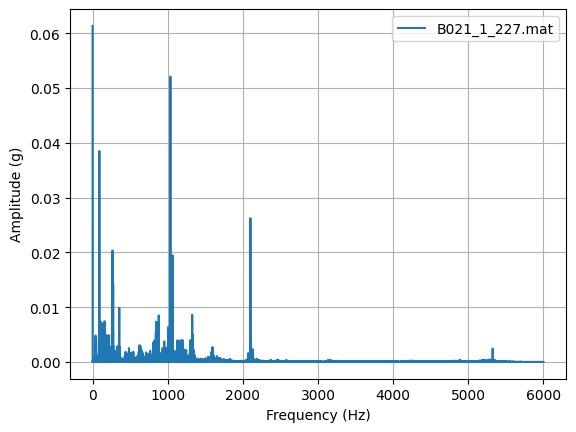

Number of signal segments: 477


c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibrati

Analysing file: IR021_1_214.mat
Number of sample points in file: 485063


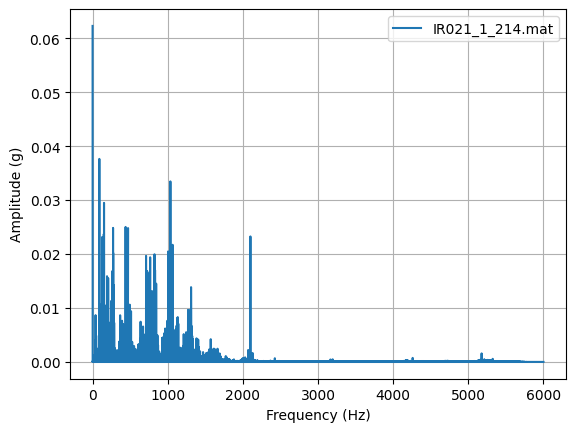

Number of signal segments: 475


c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibrati

Analysing file: OR021_6_1_239.mat
Number of sample points in file: 489125


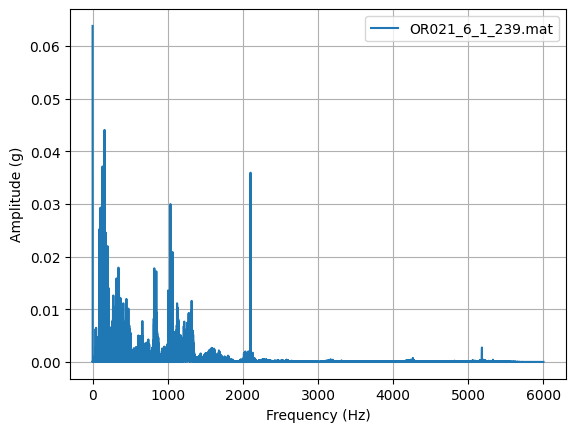

Number of signal segments: 479


c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibrati

Analysing file: Time_Normal_1_098.mat
Number of sample points in file: 483903


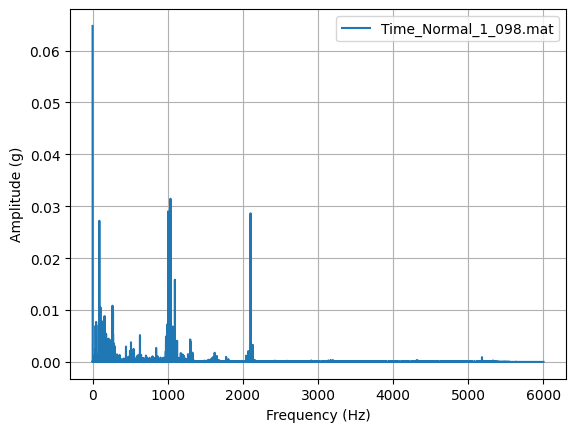

Number of signal segments: 474


c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibration_fault_diagnosis\feature_extractor.py:78: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\g.derbysheva\PycharmProjects\vibrati

In [101]:
from numpy.lib.stride_tricks import sliding_window_view
import plotly.express as px
from feature_extractor import TimeFeatureExtractor, FrequencyFeatureExtractor
from psd import get_psd

BIN_WIDTH = 1  # bin width for PSD calculation (in Hz)

WINDOW_SIZE = 1200  # to divide time series into segments of data points to analyse
OVERLAP_PERCENTAGE = 0.15  
OVERLAP_SIZE = int(WINDOW_SIZE * OVERLAP_PERCENTAGE)
HOP_SIZE = WINDOW_SIZE - OVERLAP_SIZE  # distance between the start of consecutive windows

files = []
frames = []
psd_frames = []
segmented_psd_frames = []
psd_data = pd.DataFrame
segmented_psd_data = pd.DataFrame
labeled_data = pd.DataFrame
plt.figure()  # figure to plot fft

for file in os.listdir(RAW_FILES + 'selected_files/'):
    files.append(file)
    raw_dict = sio.loadmat(RAW_FILES + 'selected_files/' + file)  # load raw data file in .mat format
    for i in range(len(SENSOR_NAMES)):
        sensor = SENSOR_NAMES[i]
        if sensor in raw_dict:
            time_series = raw_dict[sensor].flatten()  # extract time series for one of the accelerometers and convert 2D array to 1D array
            sample_points = len(time_series)
            print('Analysing file: ' + file)
            print('Number of sample points in file: ' + str(sample_points))

            x_fft, y_fft = transform(data=time_series, sample_points=sample_points)  # FFT transform signal
            plt.plot(x_fft, y_fft, label=file)  # Plot FFT
            plt.grid()
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Amplitude (g)')
            plt.legend()
            plt.show()

            # Data segmentation
            segmented_signal = sliding_window_view(x=time_series, window_shape=WINDOW_SIZE)[::HOP_SIZE]
            print('Number of signal segments: ' + str(len(segmented_signal)))
                 
            # Extract statistical features form non-normalized time-domain signal segments
            time_extractor = TimeFeatureExtractor()
            time_features = time_extractor.extract_features(segmented_signal)
            time_features['Fault type'] = file[:-10]  # label time domain features with fault type
            frames.append(time_features)

            # Calculate PSD for entire time series for each file
            df_psd = get_psd(data=time_series, bin_width=BIN_WIDTH, name=file, sampling_rate=SAMPLING_RATE)
            psd_frames.append(df_psd)
            psd_data = pd.concat(psd_frames, ignore_index=True, axis=1)

            # Calculate PSD for segmented time series
            for i in range(len(segmented_signal)):
                segment = segmented_signal[i]
                df_segmented_psd = get_psd(data=segment, bin_width=1, name=file, sampling_rate=WINDOW_SIZE) # use segment window length as sampling rate in this case
                segmented_psd_frames.append(df_segmented_psd)

                # Extract features from PSD frequency spectrum segments
                freq_extractor = FrequencyFeatureExtractor()
                freq_features = freq_extractor.extract_features(df_segmented_psd)
                freq_features['Fault type'] = file[:-10]  # label frequency domain features with fault type
                frames.append(freq_features)

segmented_psd_data = pd.concat(segmented_psd_frames, axis=1) # each column is a PSD segment for a particular file

# combine frequency and time domain features into one labeled dataframe
labeled_data = pd.concat(frames, ignore_index=True)
labeled_data.to_csv('CWRU_preprocessed_labeled.csv', index=False)

psd_data.columns = files
psd_fig = px.line(psd_data, labels={'value': 'Acceleration (g^2/Hz)'}, log_x=True, log_y=True)  # Plot PSD for entire time series for all files
psd_fig.show()

Plot features. 

Processing feature: Standard deviation
Processing feature: Mean
Processing feature: Peak-to-peak factor
Processing feature: RMS
Processing feature: Crest factor
Processing feature: Kurtosis
Processing feature: Skewness
Processing feature: peak_frequency
Processing feature: peak_amplitude
Processing feature: rms_low_frequency
Processing feature: rms_mid_frequency
Processing feature: rms_high_frequency
Processing feature: rms_overall


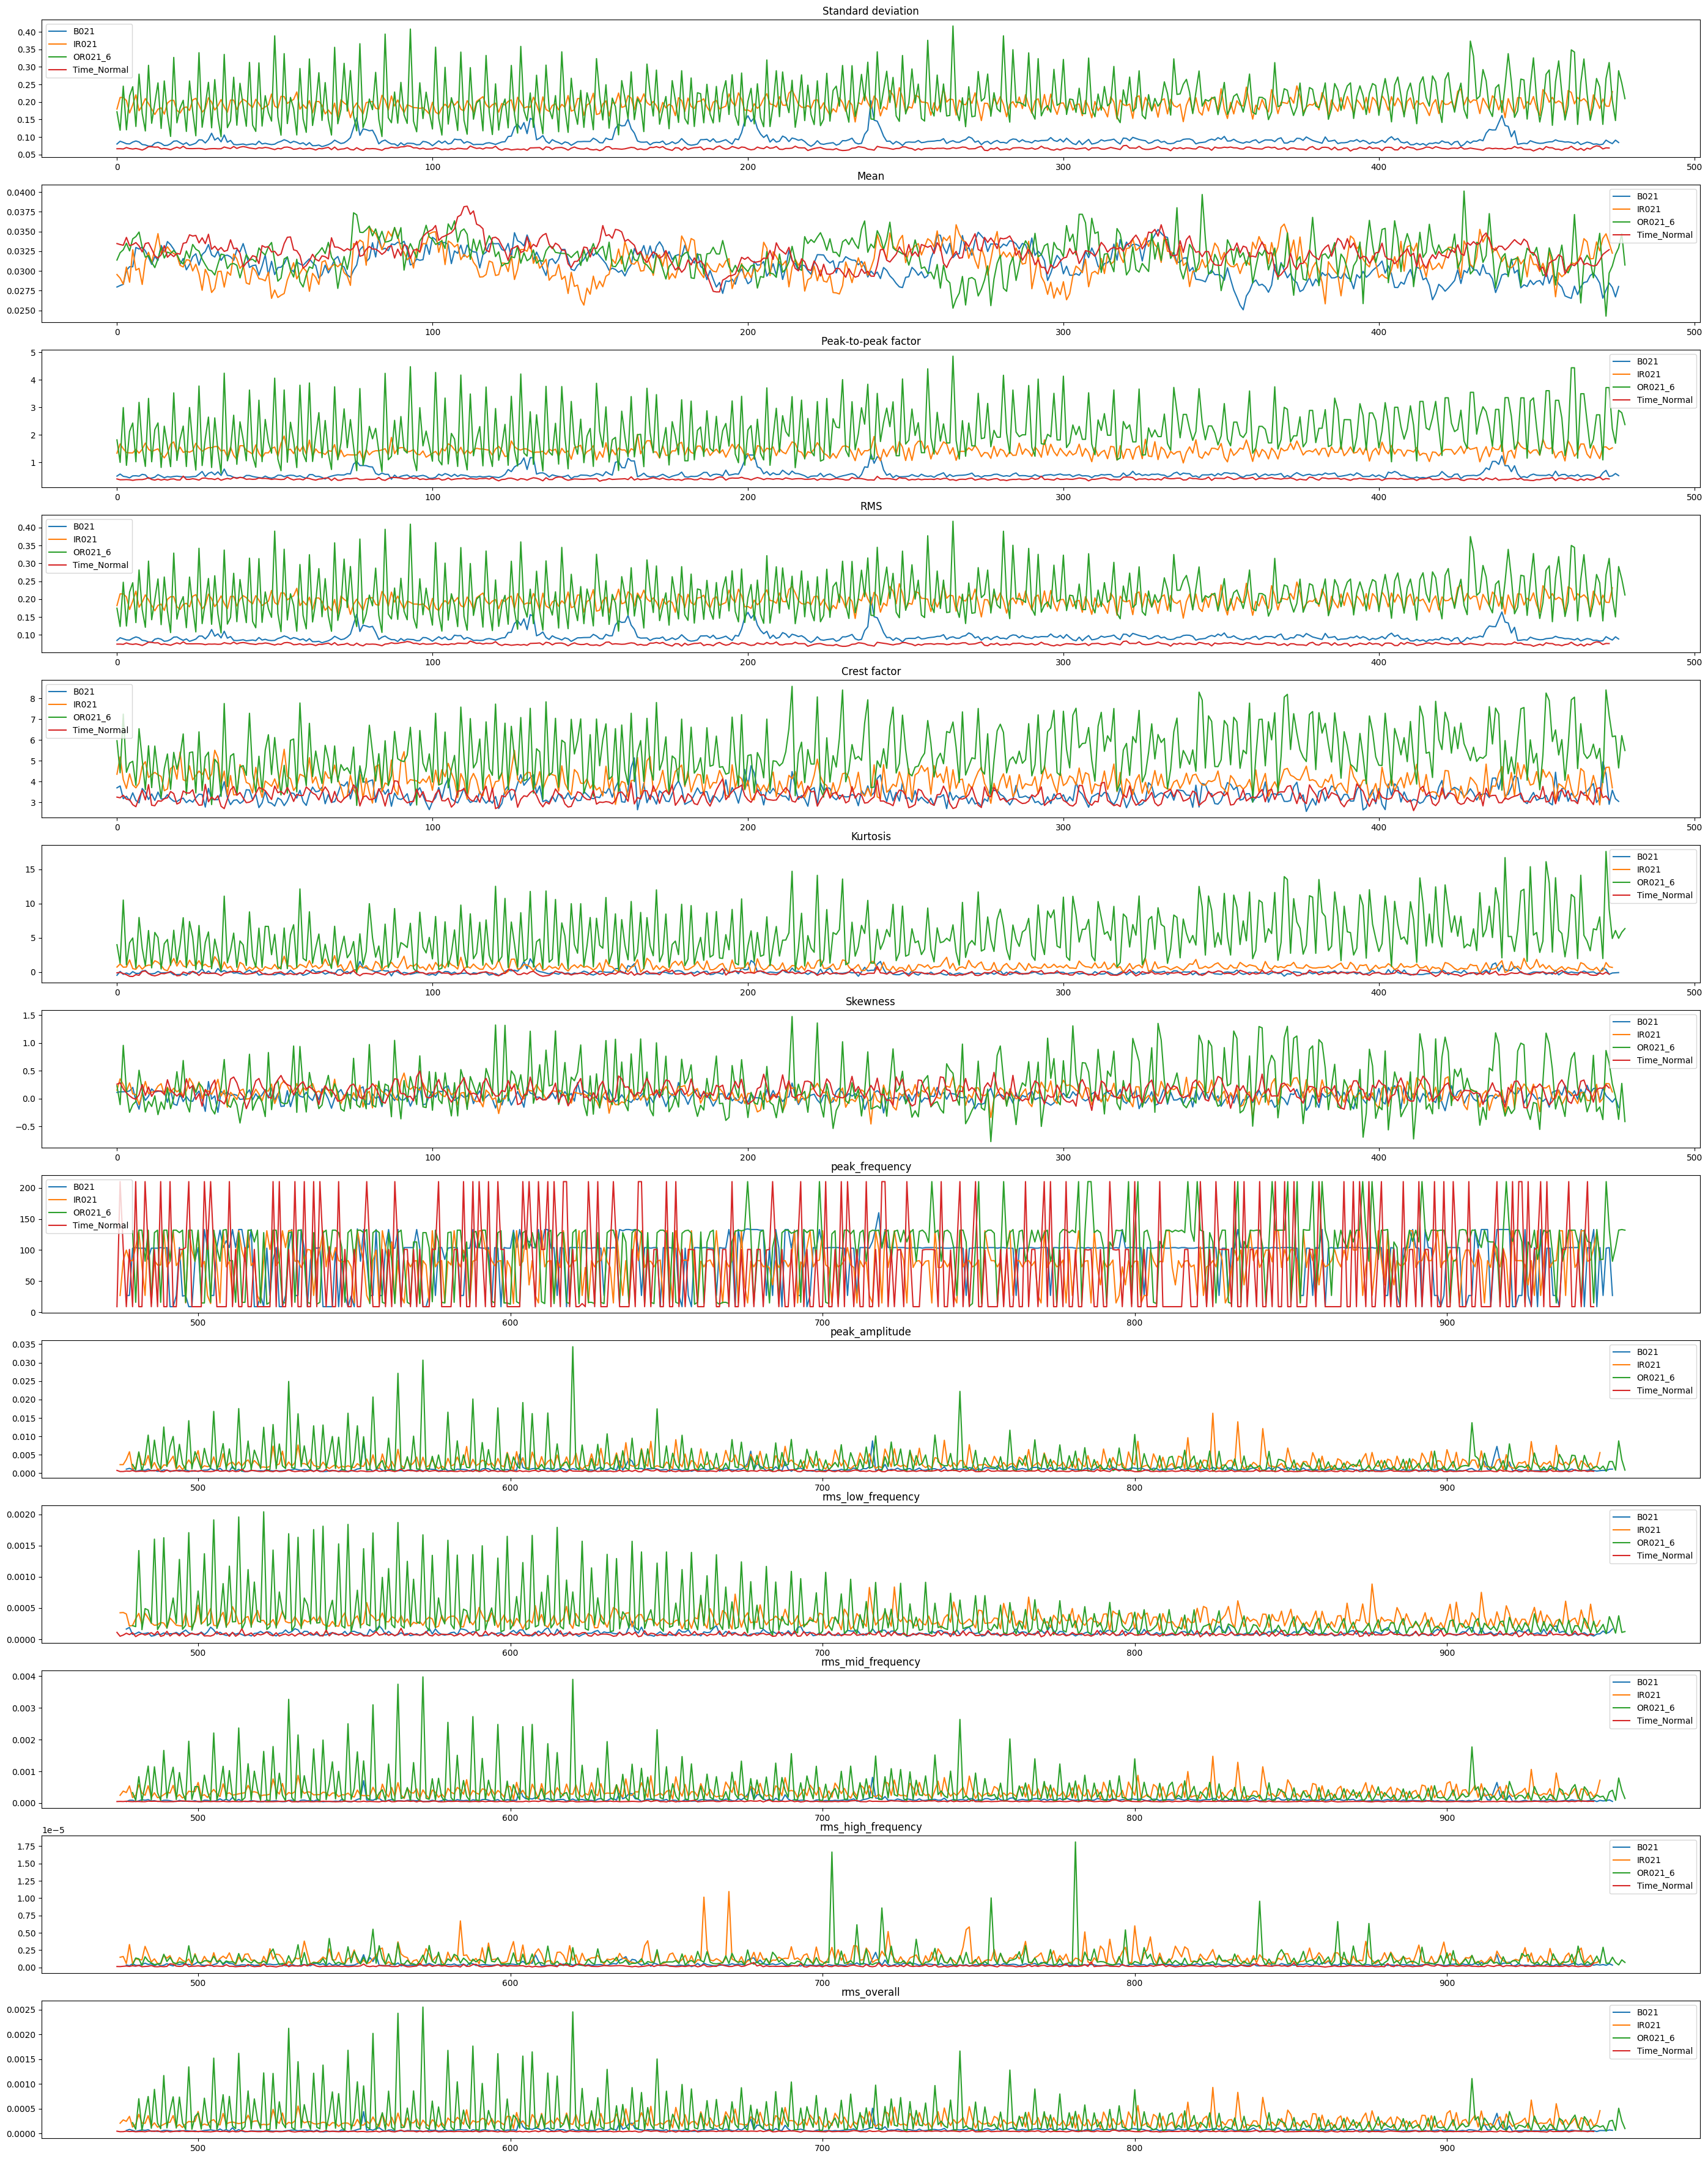

In [102]:
TARGET = 'Fault type'
FEATURES_LIST = list(labeled_data.columns)
FEATURES_LIST.remove(TARGET)

figure, axis = plt.subplots(len(FEATURES_LIST), 1, figsize=(35, 45))

for index, feature_name in enumerate(FEATURES_LIST):  # for index, value in list of features
    print(f"Processing feature: {feature_name}")
    for class_value in labeled_data[TARGET].unique():  # for each fault type/class
        filtered_df = labeled_data[labeled_data[TARGET] == class_value].reset_index(drop=True)
        if filtered_df.empty:
            print(f"No data found for class {class_value} in feature {feature_name}")
            continue
        axis[index].plot(filtered_df[feature_name], label=class_value)
        axis[index].set_title(feature_name)
        axis[index].legend()

Encode categorical target.

In [103]:
# Split dataframe into time and frequency domain features
time_features_data = labeled_data[['Standard deviation', 
            'Mean', 
            'Peak-to-peak factor', 
            'RMS', 
            'Crest factor', 
            'Kurtosis', 
            'Skewness', 
            'Fault type']]
freq_features_data = labeled_data[[
            'peak_frequency',
            'peak_amplitude',
            'rms_low_frequency',
            'rms_mid_frequency',
            'rms_high_frequency',
            'rms_overall',
            'Fault type'
        ]]

# Get rid of rows with NaN values and reindex
time_features_data = time_features_data.dropna().reset_index(drop=True)
freq_features_data = freq_features_data.dropna().reset_index(drop=True)

# Encode fault type
time_features_data['Encoded fault type'] = pd.Categorical(time_features_data['Fault type']).codes
freq_features_data['Encoded fault type'] = pd.Categorical(freq_features_data['Fault type']).codes

Feature selection. Correlation matrix?

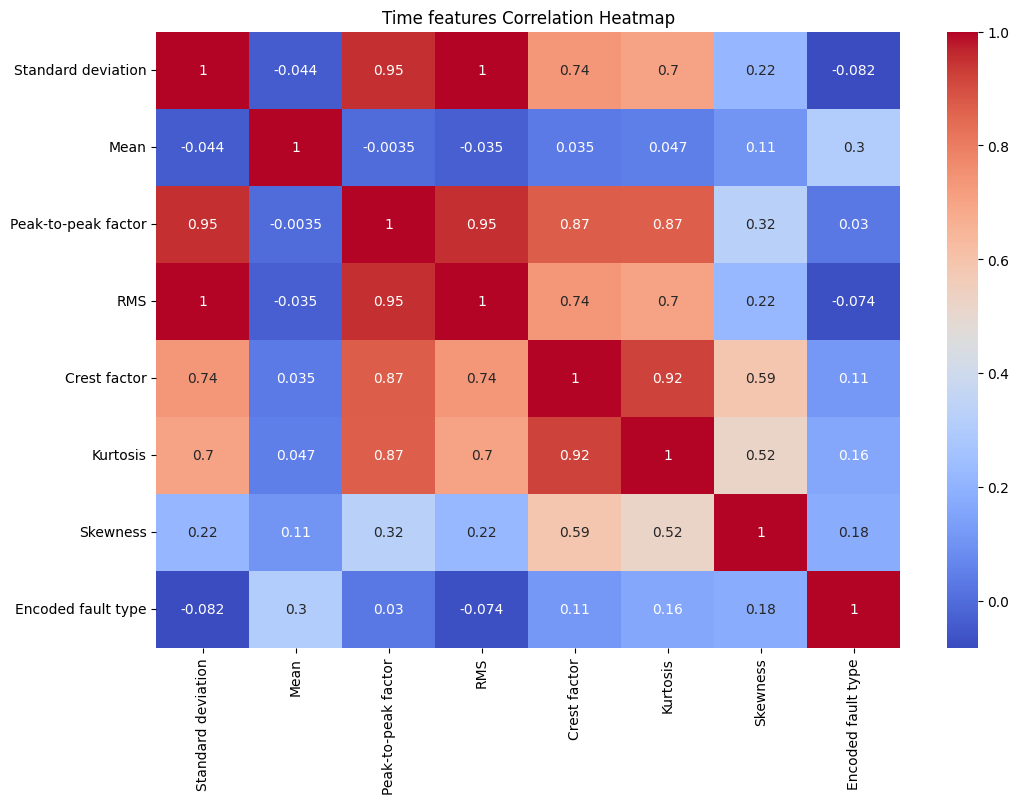

In [104]:
"""Perform feature selection with correlation analysis."""

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import seaborn as sns

correlation_matrix = time_features_data.corr(method='pearson', numeric_only=True)  # numeric_only=True to ignore original non-numeric target column
correlation_matrix.to_csv('features_correlation.csv')

# Visualize correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(time_features_data.corr(method='pearson', numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Time features Correlation Heatmap')
plt.show()

Calculate predictive power score.

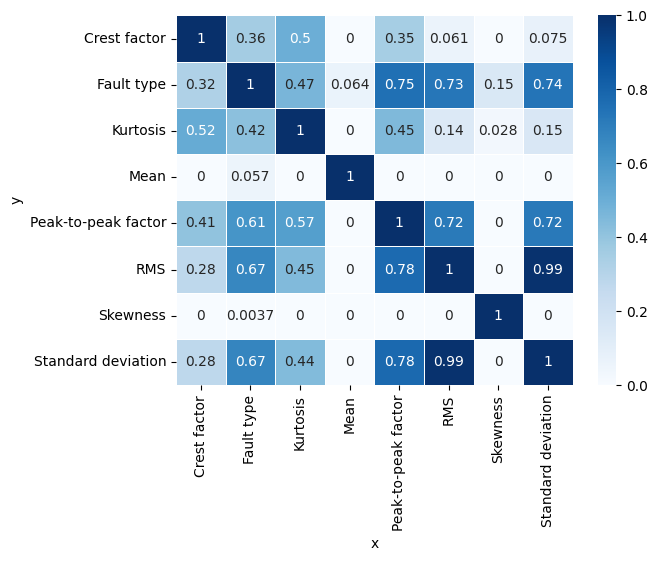

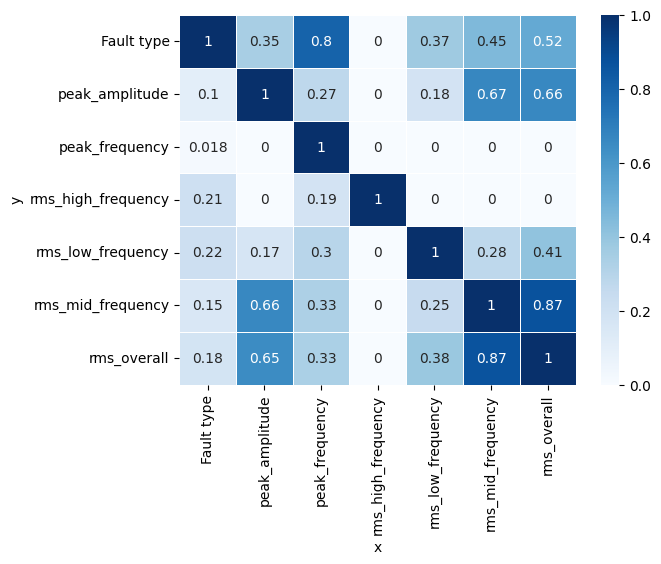

In [105]:
import ppscore as pps

# Visualizes ppscore matrix for time features
matrix_df = pps.matrix(time_features_data.drop('Encoded fault type', axis=1))[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure()
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.show()

# Visualizes ppscore matrix for frequency features
matrix_df = pps.matrix(freq_features_data.drop('Encoded fault type', axis=1))[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
plt.figure()
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)
plt.show()

REFERENCES
D. Neupane and J. Seok, "Bearing Fault Detection and Diagnosis Using Case Western Reserve University Dataset With Deep Learning Approaches: A Review," in IEEE Access, vol. 8, pp. 93155-93178, 2020, doi: 10.1109/ACCESS.2020.2990528.

https://www.kaggle.com/datasets/brjapon/cwru-bearing-datasets/data

(Neupane, Seok, 2019)

https://info.endaq.com/hubfs/Plots/enDAQ-Vibration-Monitoring-Metrics-Case-Western-Bearing-Data_2.html#PSD

https://www.mdpi.com/2079-9292/12/18/3971#sec3dot2dot1-electronics-12-03971 